In [1]:
# import commonly used libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
# import dataset

df = pd.read_csv('train.csv')
df.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


In [24]:
# split into training and test set 
from sklearn.model_selection import train_test_split

features = df.drop(['Lead'], axis=1)
labels = df['Lead']


X_train, X_test, y_train, y_test = train_test_split(
     features, labels, train_size=0.7
)


# Discriminant Analysis: 
- ### LDA & QDA

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
 
    LDA_clf = LinearDiscriminantAnalysis()
    QDA_clf = QuadraticDiscriminantAnalysis()

    LDA_clf.fit(X_train, y_train)
    QDA_clf.fit(X_train, y_train)
    

score_LDA = LDA_clf.score(X_test, y_test)
score_QDA = QDA_clf.score(X_test, y_test)

print("Score LDA: " + str(score_LDA))
print("Score QDA: " + str(score_QDA))

Score LDA: 0.8525641025641025
Score QDA: 0.8910256410256411


## Hyper tuning and Tenfold CV

In [5]:
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, GridSearchCV


rs_kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
kf = KFold(n_splits=10)

# param_grids to search
params_LDA = [{'solver': ['svd', 'lsqr', 'eigen']}]
params_QDA = [{'reg_param': [0.1, 0.2, 0.3, 0.31, 0.4, 0.5]}]


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # define search
    gs_LDA = GridSearchCV(LDA_clf, params_LDA, scoring='accuracy', cv=10)
    gs_QDA = GridSearchCV(QDA_clf, params_QDA, scoring='accuracy', cv=10) 

# perform search
    LDA_results = gs_LDA.fit(X_train, y_train)
    QDA_results = gs_QDA.fit(X_train, y_train)

# calculate scores 
score_LDA = LDA_results.score(X_test, y_test)
score_QDA = QDA_results.score(X_test, y_test)

# print findings
print("\033[1m LINEAR DISCRIMINANT ANALYSIS \033[0m\n")
print('Mean Accuracy: %.3f' % LDA_results.best_score_)
print('Config: %s' % LDA_results.best_params_)
print("Score: " + str(score_LDA) + "\n")

print("\033[1m QUADRATIC DISCRIMINANT ANALYSIS \033[0m\n")
print('Mean Accuracy: %.3f' % QDA_results.best_score_)
print('Config: %s' % QDA_results.best_params_)
print("Score: " + str(score_QDA) + "\n")


 LINEAR DISCRIMINANT ANALYSIS 

Mean Accuracy: 0.860
Config: {'solver': 'svd'}
Score: 0.8621794871794872

 QUADRATIC DISCRIMINANT ANALYSIS 

Mean Accuracy: 0.898
Config: {'reg_param': 0.2}
Score: 0.8910256410256411



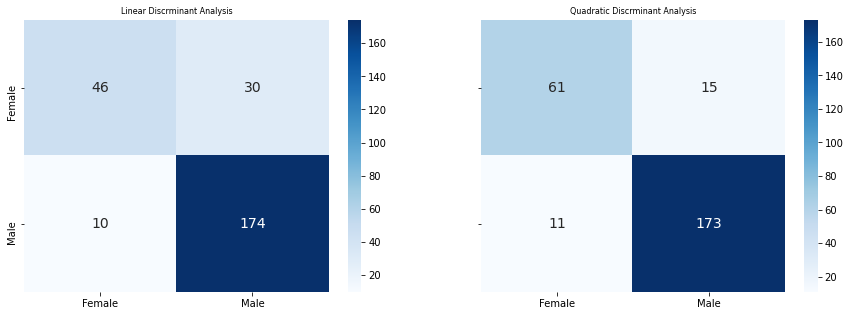

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

classifiers = {
    'Linear Discrminant Analysis': gs_LDA,
    'Quadratic Discrminant Analysis': gs_QDA
}

cf_dataframe = dict.fromkeys(classifiers.keys())
for key, classifier in classifiers.items(): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        y_pred = classifier.fit(X_train, y_train.values.ravel()).predict(X_test)
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    cf_dataframe[key]= pd.DataFrame(
        cf_matrix, index = ['Female', 'Male'], columns = ['Female', 'Male']
    )
    

####### PLOT ########

fig, axn = plt.subplots(1, len(classifiers), sharex=True, sharey=True, figsize=(15,5))

for i, ax in enumerate(axn.flat):
    k = list(cf_dataframe)[i]
    sns.heatmap(cf_dataframe[k], ax=ax, annot=True, fmt="d", annot_kws={"size": 14}, cmap='Blues')
    ax.set_title(k, fontsize=8)

In [25]:
features

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,303,2398,1334.0,1166,5,1973,2,761,174.0,43.200000,31.000000,46.0,24.0
1035,632,8404,1952.0,187,6,1992,2,5820,172.0,37.166667,24.000000,21.0,34.0
1036,1326,2750,877.0,356,2,2000,3,547,53.0,27.500000,27.666667,28.0,25.0
1037,462,3994,775.0,52,8,1996,3,2757,32.0,42.857143,38.500000,29.0,32.0


In [30]:
features = df.drop(['Lead'], axis=1)
labels = df['Lead']


X_train, X_test, y_train, y_test = train_test_split(
     features, labels, train_size=0.7
)

## Feature importance


In [31]:
from itertools import combinations, chain
from sklearn.model_selection import cross_val_score

def find_best_subset(estimator, X, y, max_size=15, cv=10, print_progress=True):
    """
    Calculates the best model of up to max_size features of X.
    estimator must have a fit and score functions.
    X must be a DataFrame.
    Source of function: https://stackoverflow.com/a/50704252/6400551
    """

    n_features = X.shape[1]
    subsets = (combinations(range(n_features), k + 1)
               for k in range(min(n_features, max_size)))

    subsets_2 = (combinations(range(n_features), k + 1)
                 for k in range(min(n_features, max_size)))

    best_size_subset = []

    progress_percentage = 0
    progress = 0
    # total_combinations = sum(math.comb(n_features, size) for size in range(max_size + 1))
    total_combinations = 0

    for subsets_k in subsets_2:
        for subset in subsets_k:
            total_combinations += 1

    if print_progress:
        print(f"Looking through {total_combinations} combinations...")

    for subsets_k in subsets:  # for each list of subsets of the same size
        best_score = -np.inf
        best_subset = None

        for subset in subsets_k:
            if print_progress:
                progress += 1

                percentage = 100.0 * (progress / float(total_combinations))
                percentage_int = int(percentage)

                #if percentage_int > progress_percentage:
                #    progress_percentage = percentage_int
                #    print(f"Progress: {progress_percentage}%")

            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                estimator.fit(X.iloc[:, list(subset)], y)
            # get the subset with the best score among subsets of the same size
                score = estimator.score(X.iloc[:, list(subset)], y)
            if score > best_score:
                best_score, best_subset = score, subset

        # to compare subsets of different sizes we must use CV
        # first store the best subset of each size
        best_size_subset.append(best_subset)

    # compare best subsets of each size
    best_score = -np.inf
    best_subset = None
    list_scores = []
    for subset in best_size_subset:
        score = cross_val_score(estimator, X.iloc[:, list(subset)], y, cv=cv).mean()
        list_scores.append(score)
        if score > best_score:
            best_score, best_subset = score, subset

    return best_subset, best_score, best_size_subset, list_scores





In [49]:
best_set, best_score, best_size_subset, list_scores = find_best_subset(QuadraticDiscriminantAnalysis(), features, labels)

print(f"Best subset: {best_set}")
print(f"Best score: {best_score}")
print(f"Best size subset: {best_size_subset}")
print(f"List of scores: {list_scores}")

Looking through 8191 combinations...
Best subset: (0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12)
Best score: 0.9047143390589995
Best size subset: [(6,), (4, 6), (0, 2, 3), (0, 2, 3, 6), (0, 2, 3, 4, 6), (0, 1, 2, 3, 4, 6), (0, 1, 2, 3, 4, 6, 11), (0, 1, 2, 3, 4, 6, 10, 11), (0, 1, 2, 3, 4, 5, 6, 10, 11), (0, 1, 2, 3, 4, 6, 8, 9, 10, 11), (0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12), (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)]
List of scores: [0.7632468259895444, 0.7738610903659447, 0.8132561613144137, 0.853696788648245, 0.8700802837938759, 0.8835324869305452, 0.8960324869305453, 0.8979742345033607, 0.8921956684092607, 0.8979835698282301, 0.9047143390589995, 0.900858849887976, 0.8604088872292757]


c:\users\jonathan\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\jonathan\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\jonathan\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\jonathan\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\jonathan\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\jonathan\appdata\local\pro

In [47]:
Jonathan LDA: 0, 1, 2, 3, 4, 6, 9, 11, 12
Jonathan QDA: 0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12
Simon: 0, 2, 3, 8
Benny: 0, 1, 2, 3, 4, 6, 11, 12
Gholam: 0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12


SyntaxError: invalid syntax (<ipython-input-47-6d4a5074b1c7>, line 1)

In [48]:
best_subset = get_best_subset([0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12])
print(best_subset)

['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead']


In [8]:
features

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,303,2398,1334.0,1166,5,1973,2,761,174.0,43.200000,31.000000,46.0,24.0
1035,632,8404,1952.0,187,6,1992,2,5820,172.0,37.166667,24.000000,21.0,34.0
1036,1326,2750,877.0,356,2,2000,3,547,53.0,27.500000,27.666667,28.0,25.0
1037,462,3994,775.0,52,8,1996,3,2757,32.0,42.857143,38.500000,29.0,32.0


In [9]:
#Jonathan LDA: 0, 1, 2, 3, 4, 6, 9, 11, 12
    
def get_best_subset(arr_of_features):
    subset = df.columns.values.tolist()
    subset_to_remove = df.columns.values.tolist()
    
    for index in sorted(arr_of_features, reverse=True):
        del subset_to_remove[index]
    
    for index in sorted(subset_to_remove, reverse=True):
        subset.remove(index)        
        
    return subset

In [22]:
best_subset = get_best_subset([0, 1, 2, 3, 4, 5, 6, 9, 11, 12])

features = df[best_subset]
labels = df['Lead']


X_train, X_test, y_train, y_test = train_test_split(
     features, labels, train_size=0.7
)

In [17]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
 
    LDA_clf = LinearDiscriminantAnalysis()
    QDA_clf = QuadraticDiscriminantAnalysis()

    LDA_clf.fit(X_train, y_train)
    QDA_clf.fit(X_train, y_train)
    

score_LDA = LDA_clf.score(X_test, y_test)
score_QDA = QDA_clf.score(X_test, y_test)

print("Score LDA: " + str(score_LDA))
print("Score QDA: " + str(score_QDA))

Score LDA: 0.8653846153846154
Score QDA: 0.9006410256410257


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, GridSearchCV


rs_kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
kf = KFold(n_splits=10)

# param_grids to search
params_LDA = [{'solver': ['svd', 'lsqr', 'eigen']}]
params_QDA = [{'reg_param': [0.1, 0.2, 0.3, 0.31, 0.4, 0.5]}]


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # define search
    gs_LDA = GridSearchCV(LDA_clf, params_LDA, scoring='accuracy', cv=10)
    gs_QDA = GridSearchCV(QDA_clf, params_QDA, scoring='accuracy', cv=10) 

# perform search
    LDA_results = gs_LDA.fit(X_train, y_train)
    QDA_results = gs_QDA.fit(X_train, y_train)

# calculate scores 
score_LDA = LDA_results.score(X_test, y_test)
score_QDA = QDA_results.score(X_test, y_test)

# print findings
print("\033[1m LINEAR DISCRIMINANT ANALYSIS \033[0m\n")
print('Mean Accuracy: %.3f' % LDA_results.best_score_)
print('Config: %s' % LDA_results.best_params_)
print("Score: " + str(score_LDA) + "\n")

print("\033[1m QUADRATIC DISCRIMINANT ANALYSIS \033[0m\n")
print('Mean Accuracy: %.3f' % QDA_results.best_score_)
print('Config: %s' % QDA_results.best_params_)
print("Score: " + str(score_QDA) + "\n")


In [38]:
from sklearn.ensemble import RandomForestClassifier

features = df.drop(['Lead'], axis=1)
labels = df['Lead']


X_train, X_test, y_train, y_test = train_test_split(
     features, labels, train_size=0.7
)

err = 0
for i in range(100):
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    err = err + np.mean(pred != y_test)
err = err/100
print(f'Error rate for Random Forest: {err:.3f}')

Error rate for Random Forest: 0.146


In [ ]:
from sklearn.ensemble import RandomForestClassifier



features = df.drop(['Lead'], axis=1)
labels = df['Lead']


X_train, X_test, y_train, y_test = train_test_split(
     features, labels, train_size=0.7
)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
err = np.mean(pred != y_test)
print(f'Error rate for Random Forest: {err:.3f}')